In [1]:
import FPCAnalysis
import numpy as np

In [2]:
#load everything we need
#-----------------------

path = '/home/crbrown/M06_th45/'
numframe = 2000
inputs = FPCAnalysis.ddhr.read_input(path=path)

#load the fields data
dfields = FPCAnalysis.ddhr.field_loader(path=path,num=numframe)
dfields.keys()

#load the density data
dden = FPCAnalysis.ddhr.den_loader(path=path,num=numframe)
dden.keys()

#load subset of particles that we want to compute the FPC of
path_particles = path+"Output/Raw/Sp01/raw_sp01_{:08d}.h5" #note that this specifies the species!
x1 = 39.5
x2 = 41.5
y1 = 0
y2 = .5 #note, for the example data, yz plane is 12x12 d_i large, but here we load just part of that for computational efficiency while learning
z1 = 0
z2 = .5
dparticles = FPCAnalysis.ddhr.read_box_of_particles(path_particles, numframe, x1, x2, y1, y2, z1, z2)


In [3]:
print("NOTE- We perform this analysis in the simulation rest frame!!!!")
print("we will learn how to boost frames along the vx direction later...")

NOTE- We perform this analysis in the simulation rest frame!!!!
we will learn how to boost frames along the vx direction later...


In [4]:
# compute the fpc (CEx) and hist 
vmax = 15
dv = .5

fieldkey = 'ex' #This is the key to be correlated with

vx, vy, vz, totalPtcl, hist, cor = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dparticles, dfields, fieldkey)

In [5]:
print("*****");print("");print("");print("");print("")
print('One must be careful to make sure that dfields and dparticles are in the same frame. There are no checks for this in the code!')
print("");print("");print("");print("");print("*****")

*****




One must be careful to make sure that dfields and dparticles are in the same frame. There are no checks for this in the code!




*****


In [6]:
#vx, vy, and vz are all 3d arrays like the hist from the first example notebook
vx.shape

(60, 60, 60)

In [7]:
#totalPtcl is the number of particles found in the specified bin (same as sum of hist)
totalPtcl,np.sum(hist) #if the vmax bounds aren't big enough, some particles will be lost! (but they should be about equal)
                    #(note that we factor of dv**2 is missing in the histogram- this a choice that we make, 
                    # to absorb that factor into the normalization of the histogram. 
                    # For most things it cancels out anyways)

(59762, 59249.0)

In [8]:
#hist and cor are both index [vz,vy,vx]
cor.shape,hist.shape

((60, 60, 60), (60, 60, 60))

In [9]:
#let's compute all 3 and make a 9 panel superplot
vx, vy, vz, totalPtcl, hist, corex = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dparticles, dfields, 'ex')
vx, vy, vz, totalPtcl, hist, corey = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dparticles, dfields, 'ey')
vx, vy, vz, totalPtcl, hist, corez = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2,
                            dparticles, dfields, 'ez')

#we typically normalized corei to upstream number of particles (in same size volume!)
path_particles = path+"Output/Raw/Sp01/raw_sp01_{:08d}.h5" #note that this specifies the species!
_x1 = 39.5+20
_x2 = 41.5+20
_y1 = 0
_y2 = .5 #note, for the example data, yz plane is 12x12 d_i large, but here we load just part of that for computational efficiency while learning
_z1 = 0
_z2 = .5
_tempdpar = FPCAnalysis.ddhr.read_box_of_particles(path_particles, numframe, x1, x2, y1, y2, z1, z2)

numparup = float(len(_tempdpar['x1']))
print('number of upstream particles: ', numparup)

del _tempdpar

# corex /= numparup
# corey /= numparup
# corez /= numparup

number of upstream particles:  59762.0


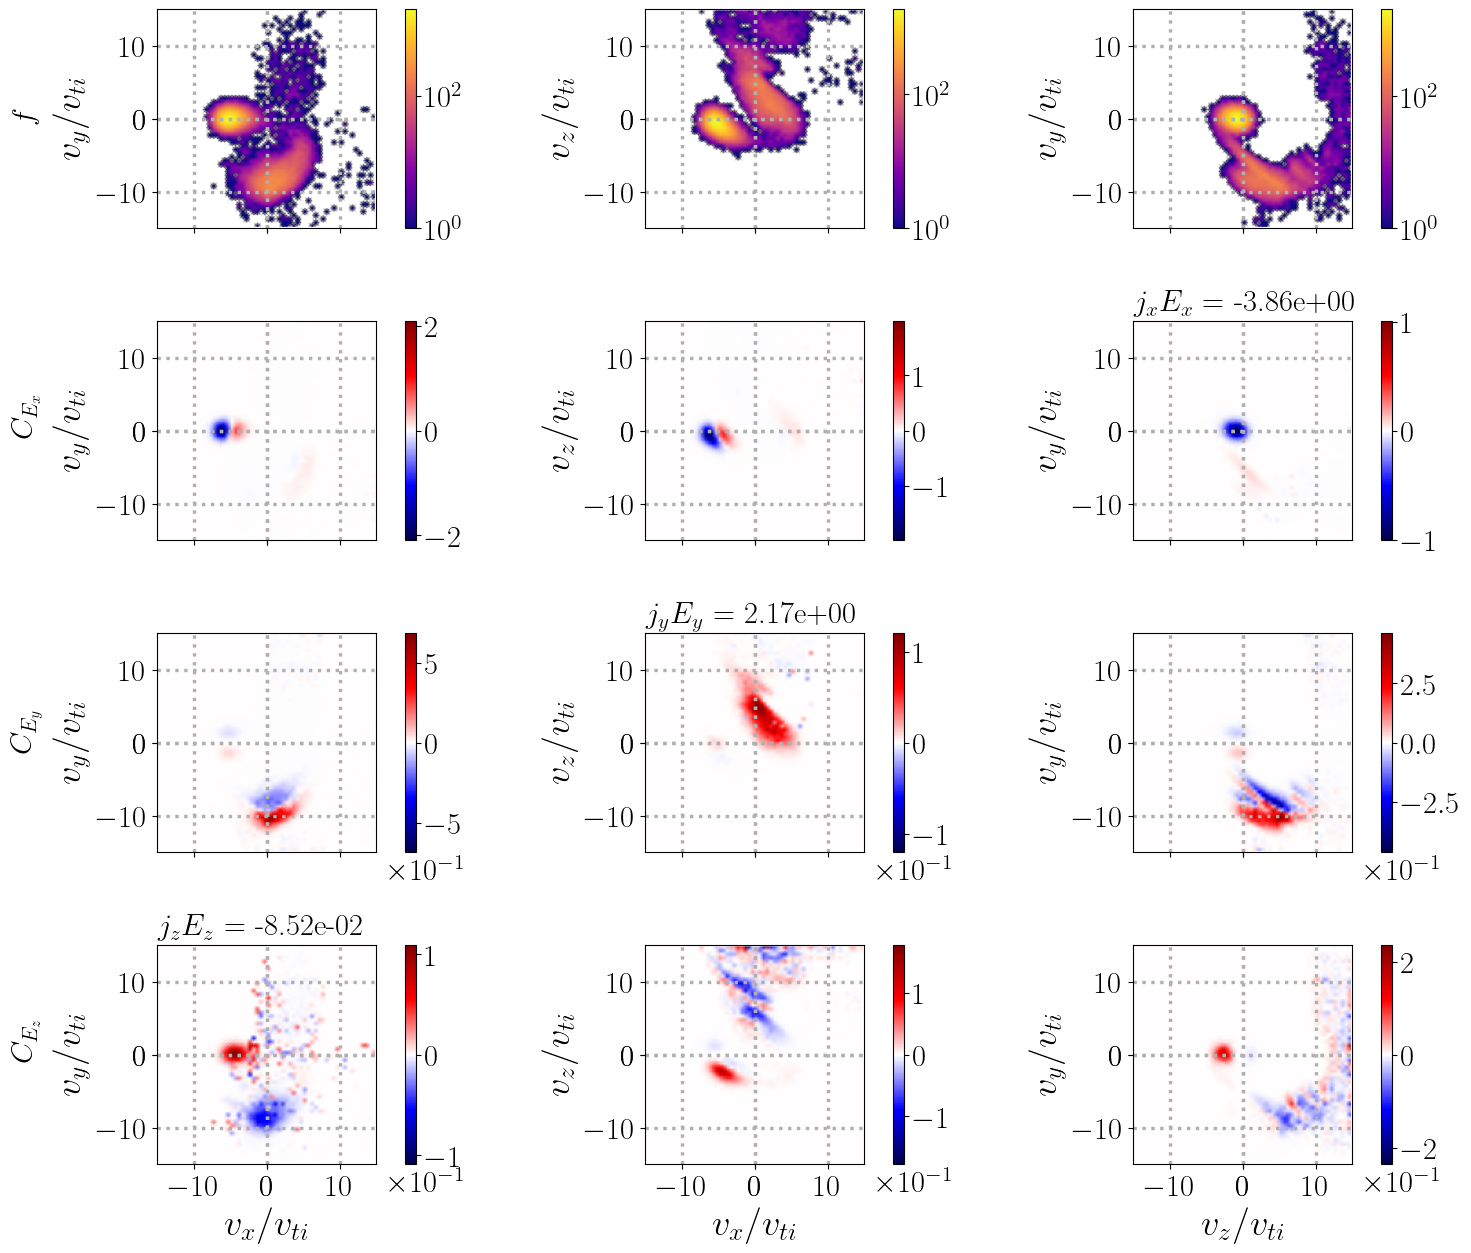

In [10]:
#plot the data
flnm = '' #set this to something to save as png
FPCAnalysis.pltvv.project_and_plot_supergrid(vx,vy,vz,vmax,hist,corex,corey,corez,flnm)


In [11]:
#now, let's compute this in FAC

#note, I (Collin) made the terrible mistake of aligning the variables associated with the 'x' direction with
# the variables associated with the 'par' direction. (and perp1 to y and perp2 to z).
# For example variables like corex when doing FAC FPC will hold Corepar, corey will hold coreperp1, corez will hold coreperp2.
#
#This differs from most conventions and can lead to some confusion in the ordering of data and naming convention but otherwise
# does not change anything. (Everything has been well tested!)
#
#Other than being a bit of a confusing data structure- it does not matter.
#

vx, vy, vz, totalPtcl, hist, corex = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dparticles, dfields, 'epar')
vx, vy, vz, totalPtcl, hist, corey = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dparticles, dfields, 'eperp1')
vx, vy, vz, totalPtcl, hist, corez = FPCAnalysis.fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dparticles, dfields, 'eperp2')



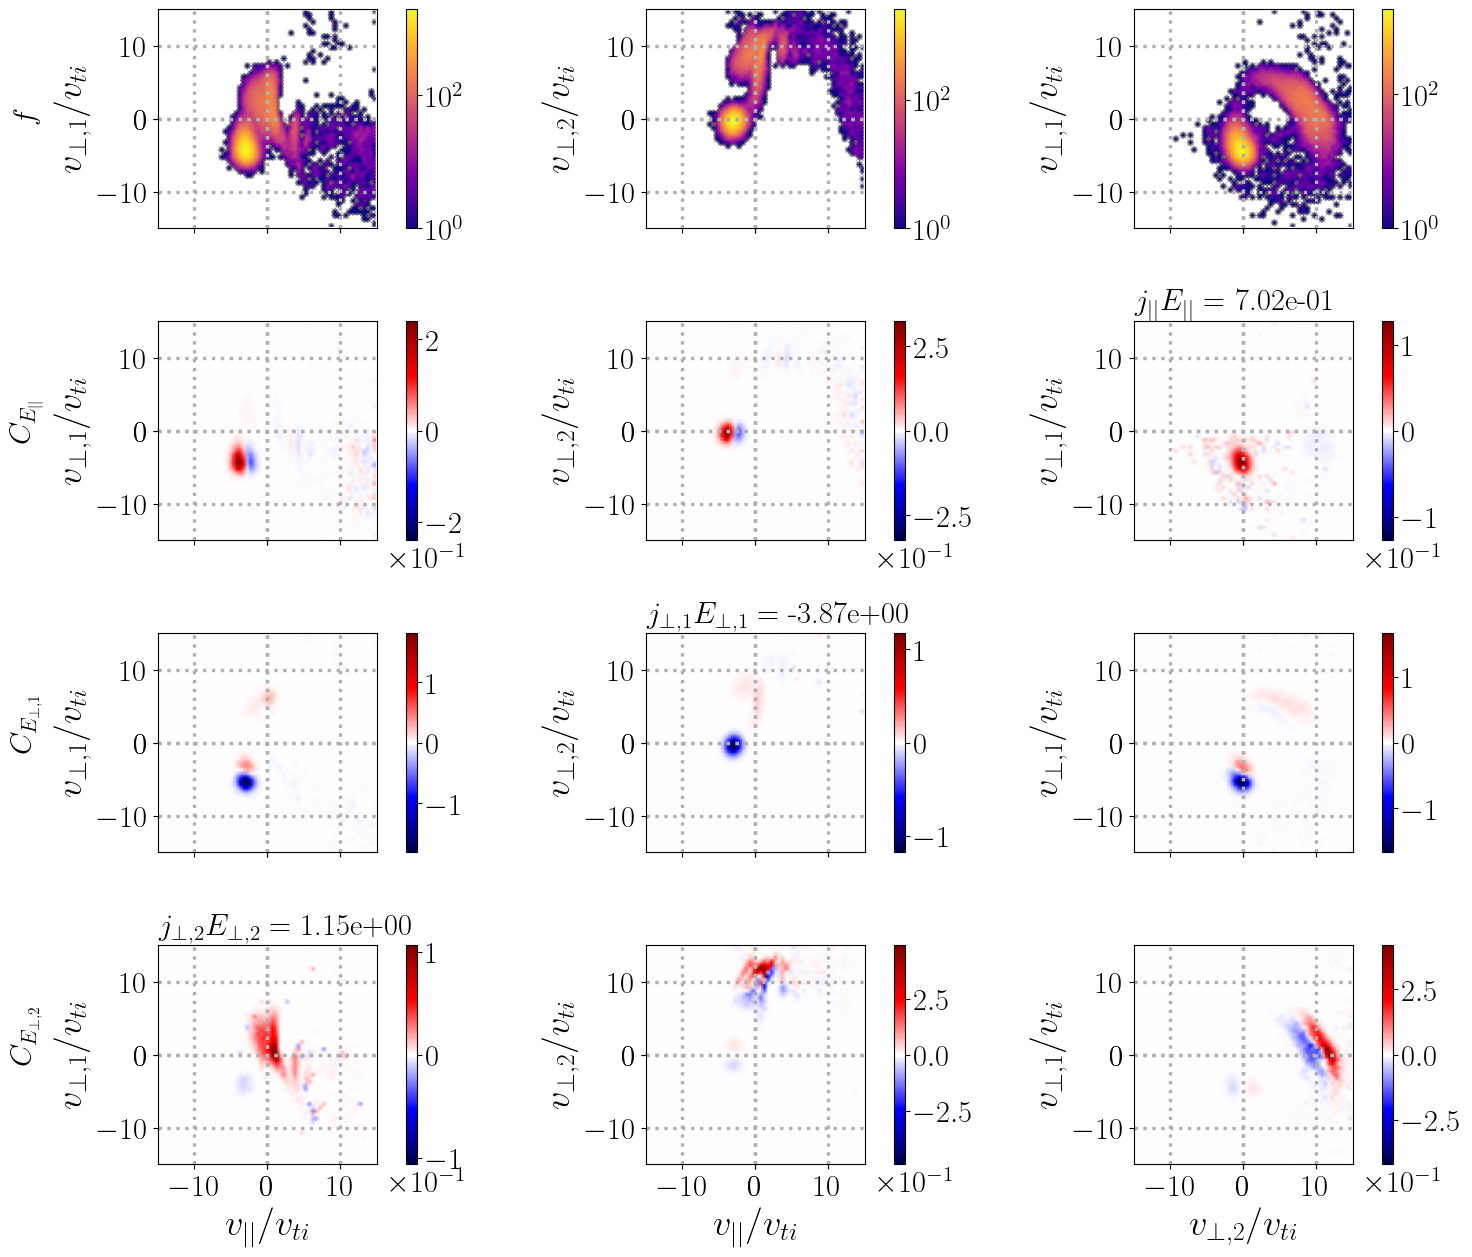

In [12]:
flnm = ''
#note the additonal plotFAC=True parameter!!!
FPCAnalysis.pltvv.project_and_plot_supergrid(vx,vy,vz,vmax,hist,corex,corey,corez,flnm=flnm,
                                            plotFAC=True)
